# Bengkel Koding - ADS Hungarian Data

## Preparation

Melakukan instalasi pandas dan numpy jika belum tersedia

In [ ]:
# !python -m pip install --upgrade pip
# %pip install pandas numpy

Import semua modul yang diperlukan untuk membuka data dan memproses data

In [9]:
import pandas as pd
import re
import numpy as np
import itertools

## Load the data

Tentukan dimana lokasi file "hungarian.data" lalu masukkan ke variabel (dir)

In [10]:
dir = "hungarian.data"

Buka file dengan encoder "Latin1" dan simpan data pada variabel sementara (lines)

In [11]:
with open(dir, encoding="Latin1") as file:
  lines = [line.strip() for line in file]

Kemudian lakukan iterasi untuk semua baris data yang ada

In [12]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

Ubah data yang tersimpan pada "data" menjadi format Data Frame pandas

In [13]:
df = pd.DataFrame.from_records(data)

Lakukan pengecekan dengan .head() untuk melihat 5 data paling atas

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


## Data Preprocessing

Melihat informasi detail data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Dilakukan slicing/pemotongan data paling awal dan paling akhir karna tidak termasuk ke dalam data yang akan diolah

In [16]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

Ubah tipe data "data" yang sebelumnya adalah **object** menjadi **float** supaya dapat diolah lebih lanjut

In [18]:
df = df.astype(float)

Lakukan pengecekan dan terlihat bahwa tipe datanya sekarang adalah **float**

In [ ]:
df.info()

Karena pada deskripsi dataset dijelaskan bahwa **-9.0** adalah **Null** maka ubah semua nilai -9.0 menjadi NaN (np.nan tipe data numpy) supaya tidak tercampur pada saat kalkulasi

In [21]:
df.replace(-9.0, np.nan, inplace=True) #inplace set True untuk merubah langsung pada data aslinya

Cek berapa jumlah Null yang ada di dalam data

In [22]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

Cek juga secara langsung isi datanya

In [23]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


Sesuai dengan deskripsi dataset, tidak semua data diperlukan. Hanya 14 data saja yang penting dan memungkinkan berpengaruh tinggi pada model akhir nya nanti. Maka filter/pilih data dengan cara berikut

In [26]:
# Nomor tidak sesuai dengan nomor pada desc karena akses dilakukan dengan index (mulai dari 0) dan juga sudah dilakukan slicing di depannya
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

In [27]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


Ubah nama atribut/kolom sesuai dengan nama aslinya untuk mempermudah saat pengolahan data

In [29]:
# Atur dulu nama setiap kolomnya
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

In [30]:
# Ubah langsung pada datanya dengan sytax berikut
df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\dimas\AppData\Local\Temp\ipykernel_21248\2314554588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Cek dan terlihat bahwa nama atribut/kolom sudah berubah

In [ ]:
df_selected.info()

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

Cek berapa jumlah record yang null pada semua atribut yang telah dipilih

In [32]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Setelah dicek ternyata atribut 'ca', 'slope', dan 'thal' memiliki jumlah Null yang sangat banyak melebihi 70%. Oleh karena itu akan lebih bijak jika dihapus (drop) saja dibandingkan dilakukan manipulasi data.

In [33]:
col_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(col_to_drop, axis=1)

Untuk atribut yang missing value/Null nya hanya sedikit bisa dilakukan manipulasi data, pada kasus ini akan dilakukan pengisian dengan nilai rata-rata.

In [35]:
# Simpan nilai semua kolmnya pada variabel sementara dan hapus nilai Null nya
meanTBPS    = df_selected['trestbps'].dropna()
meanChol    = df_selected['chol'].dropna()
meanfbs     = df_selected['fbs'].dropna()
meanRestCG  = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang   = df_selected['exang'].dropna()

# Ubah menjadi tipe data float
meanTBPS    = meanTBPS.astype(float)
meanChol    = meanChol.astype(float)
meanfbs     = meanfbs.astype(float)
meanRestCG  = meanRestCG.astype(float)
meanthalach = meanthalach.astype(float)
meanexang   = meanexang.astype(float)

# Hitung nilai rata-rata dan lakukan pembulatan
meanTBPS    = round(meanTBPS.mean())
meanChol    = round(meanChol.mean())
meanfbs     = round(meanfbs.mean())
meanRestCG  = round(meanRestCG.mean())
meanthalach = round(meanthalach.mean())
meanexang   = round(meanexang.mean())

In [36]:
print(meanTBPS, meanChol, meanfbs, meanRestCG, meanthalach, meanexang)
# 133 251 0 0 139 0

133 251 0 0 139 0


Atur terlebih dahulu kolom mana saja yang akan diubah nilai null record nya

In [37]:
fill_values = {
    'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
    'thalach': meanthalach,
    'exang': meanexang,
    'restecg': meanRestCG
}

Ubah semua nilai null dengan nilai rata-rata yang didapatkan sebelumnya menggunakan syntax berikut

In [38]:
dfClean = df_selected.fillna(value=fill_values)

Setelah dicek sudah terlihat bahwa semua atribut/kolom tidak ada yang null

In [39]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Kemudian dilakukan penghapusan nilai duplikat untuk data yang nilai record nya sama

In [40]:
# Cek apakah ada data yang duplikat
dup_rows = dfClean.duplicated()
dfClean[dup_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [41]:
# Cek lagi apakah benar-benar duplikat
dfClean[dfClean.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Setelah dihapus, ketika dicek ulang maka tidak ada yang muncul

In [43]:
# Hapus record yang duplikat
dfClean = dfClean.drop_duplicates()
print("Row duplicate:")
dfClean[dfClean.duplicated(keep=False)]

Row duplicate:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


Cek data setelah dimuat, dipilih, dan dibersihkan

In [44]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Mulai meninjau label/output/result untuk setiap record yang disimpan pada atribut bernama "target". 0 mengindikasikan bahwa tidak ada penyakit jantung dan 4 mengindikasikan tingkat penyakit jantung yang tinggi, sehingga semakin tinggi nilai (target) semakin parah sakitnya, berlaku sebaliknya.

In [45]:
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

# Mencari Korelasi Antar Fitur

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

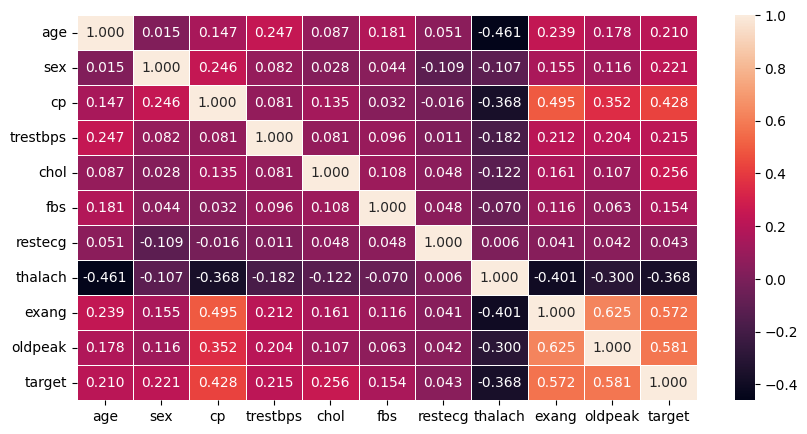

In [ ]:
cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt='.3f')

### Pemisahan data dengan label

In [ ]:
x = dfClean.drop("target", axis=1).values
y = dfClean.iloc[:,-1]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

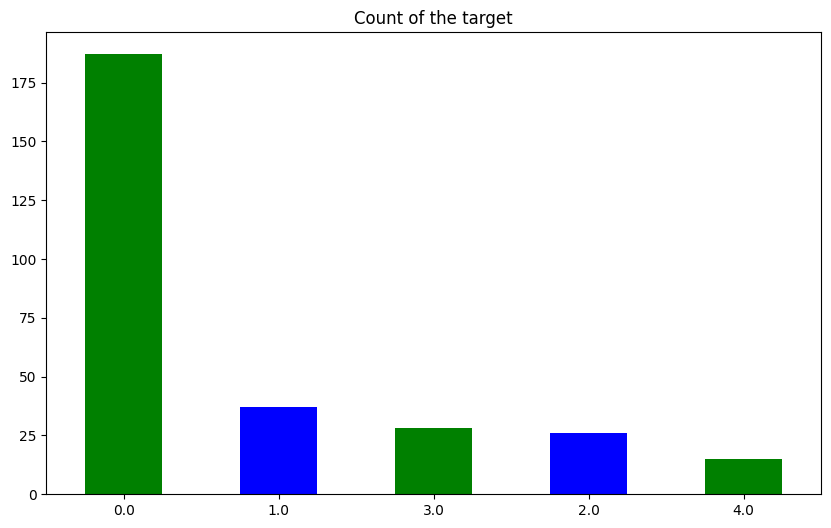

In [ ]:
dfClean['target'].value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue'])
plt.title("Count of the target")
plt.xticks(rotation=0)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# oversampling
smote = SMOTE(random_state=42)
x_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(0.0,)'),
  Text(1, 0, '(1.0,)'),
  Text(2, 0, '(2.0,)'),
  Text(3, 0, '(3.0,)'),
  Text(4, 0, '(4.0,)')])

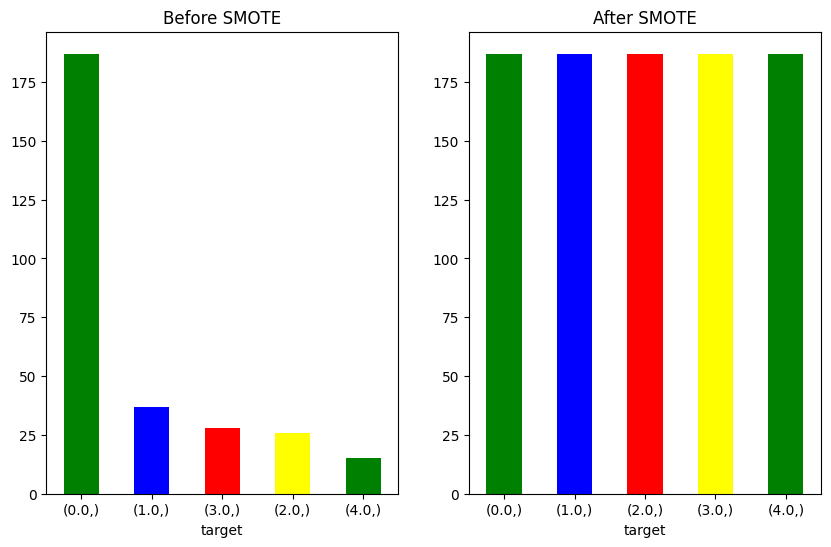

In [ ]:
plt.figure(figsize=(12,4))
new_df1 = pd.DataFrame(data=y)

plt.subplot(1,2,1)
new_df1.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("Before SMOTE")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'yellow'])
plt.title("After SMOTE")
plt.xticks(rotation=0)

### Normalization

In [ ]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_smote_resampled_normal = scaler.fit_transform(x_smote_resampled)
print(len(x_smote_resampled_normal))

935


In [ ]:
dfcek1 = pd.DataFrame(x_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
